# COVID-19 Andamento Nazionale

In [1]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import os
import matplotlib.dates as dates
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Per rimuovere la griglia dal grafico
# sns.set_style("white")

## Download data

In [3]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 3358 (delta 19), reused 43 (delta 18), pack-reused 3312
Receiving objects: 100% (3358/3358), 157.04 MiB | 7.81 MiB/s, done.
Resolving deltas: 100% (2424/2424), done.
Updating files: 100% (477/477), done.


## Read data

In [4]:
# Nazionale
country_df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data', parse_dates=True)

In [5]:
# Regionale
regione = 'Piemonte'
country_df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', index_col='data', parse_dates=True)
group = country_df.groupby('denominazione_regione')['denominazione_regione'].count()
country_df = country_df.loc[country_df['denominazione_regione'] == regione]

In [6]:
country_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)

In [7]:
country_df.tail()

,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,,,,,
2020-05-06 17:00:00,1,Piemonte,45.073274,7.680687,2147,150,2297,12561,14858,-465,165,9834,3247,27939,188057,131269.0
2020-05-07 17:00:00,1,Piemonte,45.073274,7.680687,2147,150,2297,12172,14469,-389,196,10384,3282,28135,194584,134567.0
2020-05-08 17:00:00,1,Piemonte,45.073274,7.680687,2013,140,2153,11954,14107,-362,233,10956,3305,28368,201183,138830.0
2020-05-09 17:00:00,1,Piemonte,45.073274,7.680687,2010,143,2153,11781,13934,-173,181,11284,3331,28549,205800,141515.0
2020-05-10 17:00:00,1,Piemonte,45.073274,7.680687,2024,137,2161,11489,13650,-284,116,11648,3367,28665,210370,145131.0


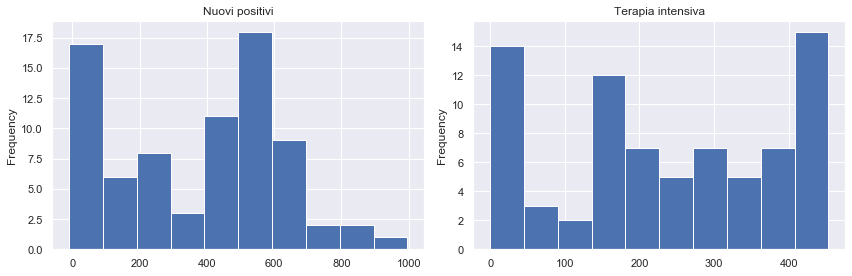

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

country_df['nuovi_positivi'].plot.hist(bins=10, ax=axes[0], title='Nuovi positivi')
country_df['terapia_intensiva'].plot.hist(bins=10, ax=axes[1], title='Terapia intensiva')

plt.tight_layout()

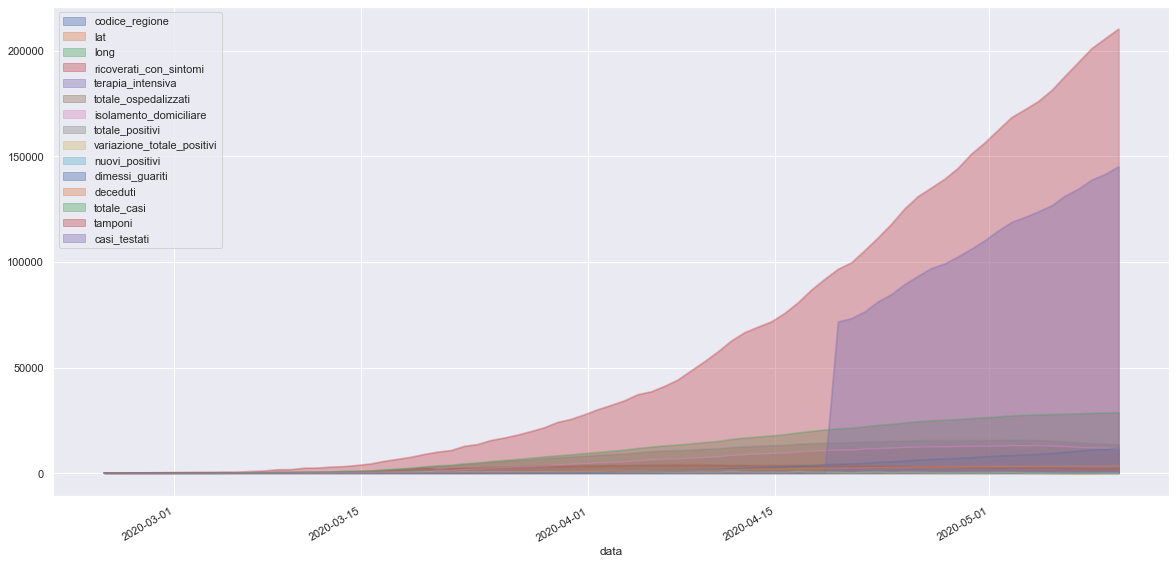

In [9]:
country_df.plot.area(alpha=0.4, figsize=(20,10),stacked=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


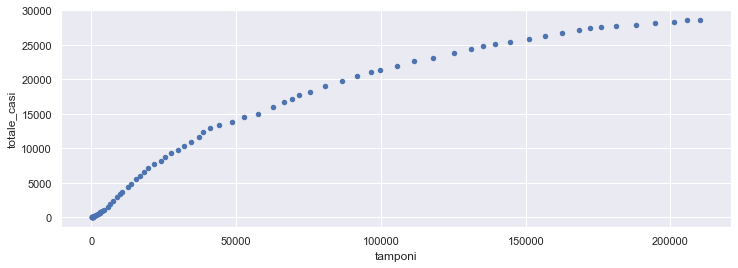

In [10]:
country_df.plot.scatter(x='tamponi',y='totale_casi', figsize=(12,4))

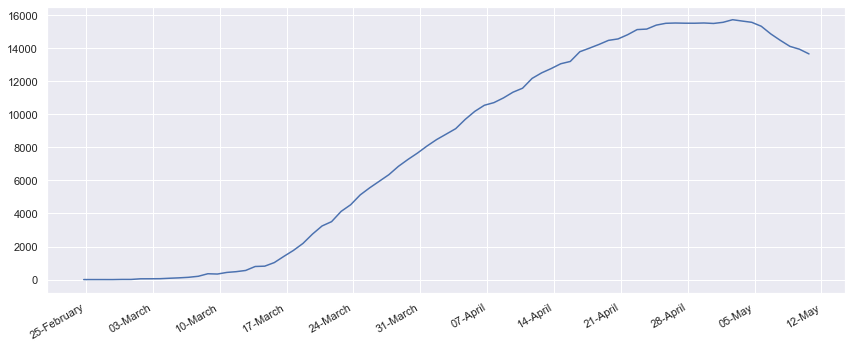

In [11]:
#country_df['totale_positivi'].plot(figsize=(12,5))


fig, ax = plt.subplots(figsize=(12,5))
ax.plot_date(country_df.index, country_df['totale_positivi'],'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%B'))

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()


### Variazione del totale di positivi (il numero deve diventare negativo)

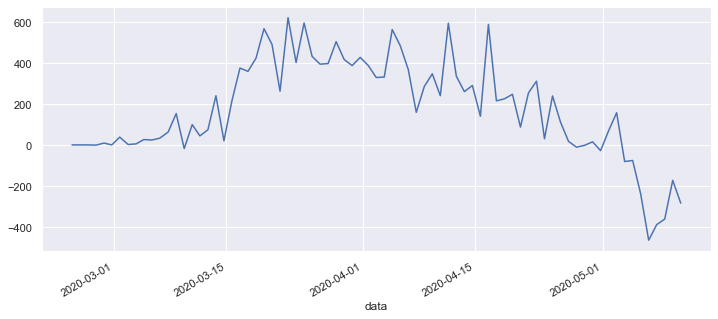

In [12]:
country_df['variazione_totale_positivi'].plot(figsize=(12,5))

### Nuove persone positive

In [13]:
country_df['nuovi_positivi'].tail()

data
2020-05-06 17:00:00    165
2020-05-07 17:00:00    196
2020-05-08 17:00:00    233
2020-05-09 17:00:00    181
2020-05-10 17:00:00    116
Name: nuovi_positivi, dtype: int64

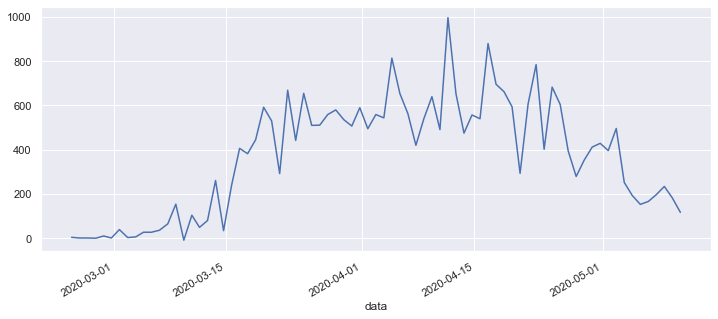

In [14]:
fig = country_df['nuovi_positivi'].plot(figsize=(12,5))
#plt.savefig('nuovi_positivi_lombardia.png')

### Tamponi

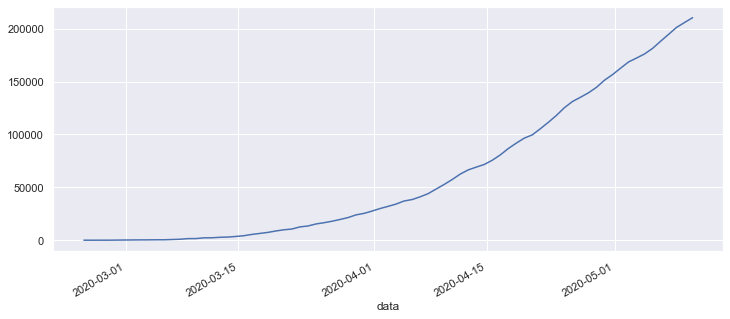

In [15]:
country_df['tamponi'].plot(figsize=(12,5))

#### Incremento giornaliero di tamponi

In [16]:
country_df['daily_tamponi'] = country_df['tamponi'] - country_df['tamponi'].shift(1)

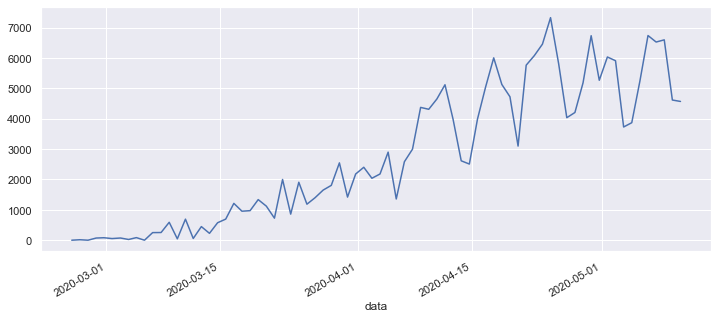

In [17]:
country_df['daily_tamponi'].plot(figsize=(12,5))

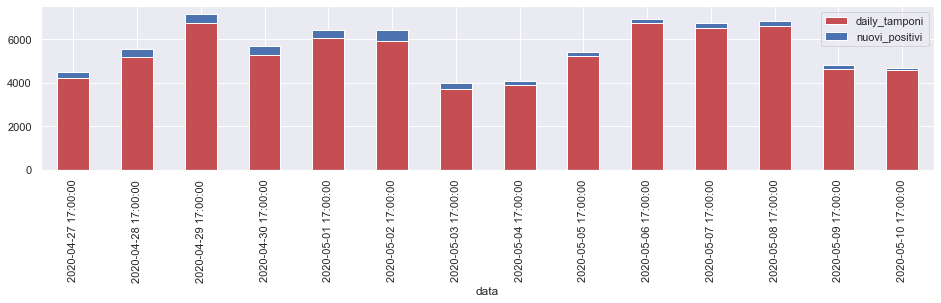

In [22]:
tamponi_df = country_df[['daily_tamponi','nuovi_positivi']]
tamponi_df.loc['2020-04-27':'2020-05-10'].plot.bar(stacked=True, figsize=(16,3),color=['r','b']);

### Nuovi positivi in relaziona ai tamponi fatti

In [19]:
#country_df.head()

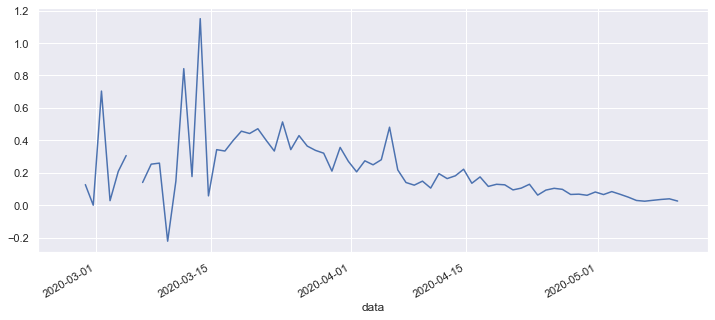

In [20]:
country_df['normed tamponi'] = country_df['nuovi_positivi'] / country_df['daily_tamponi']
country_df['normed tamponi'].plot(figsize=(12,5))